<div style="background-color:rgb(180, 123, 152); padding: 10px; text-align: center; font-size: 3em;">
  <strong><i>ANÁLISIS TIEMPO HISTORIA</i></strong>
</div>


**<font color="skyblue"><i>importar librerias</i></font>**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

**<font color="skyblue"><i>Importacion del registro corregido</i></font>**


In [2]:
# Especifica la ruta de tu archivo .xlsx
archivo_excel = 'sismopy.xlsx'

# Carga el archivo Excel en un DataFrame de pandas
df = pd.read_excel(archivo_excel)

# Convierte el DataFrame a una matriz numpy de nx2
acce1 = df.values

**_<font color="skyblue">Datos de entrada</font>_**


In [3]:
# Tn = float(input('Ingrese el valor del periodo estructural: '))  # 0.5 periodo de vibración natural del sistema 1 gdl
# psi = float(input('Ingrese el valor de la fracción de amortiguamiento: '))  # 0.02 fracción de amortiguamiento crítico
# k = float(input('Ingrese valor de la rigidez: '))  # recomendado 1 rigidez asumida para cálculos matemáticos (kip/in)
# v0 = float(input('Ingrese condición inicial de velocidad: '))  # recomendado 0;
# u0 = float(input('Ingrese condición inicial de desplazamiento: '))  # recomendado 0;
# b = float(input('Ingrese BETA NEWMARK: '))  # 0.25 recomendado para los dos casos
# g = float(input('Ingrese GANMA NEWMARK: '))  # 1/6 O 1/2
Tn = 0.5
psi = 0.02
k = 1
v0 = 0
u0 = 0
b = 0.25
g = 0.5

**_<font color="skyblue">Calculos de "m", "c", "pt" y "dt"</font>_**


In [4]:
# masa calculada en función de T y k (kip*s^2/in)
m = (Tn**2 / (4 * np.pi**2)) * k
c = psi * 2 * ((m * k)**0.5)  # coeficiente de amortiguamiento (kip*s/in)
# vector de carga aplicada a las masas por movimiento en la base
pt = acce1[:, 1] * (-m)
dt = acce1[1, 0] - acce1[0, 0]  # tamaño del paso en el tiempo

**_<font color="skyblue">Inicializando "u", "v" y "a"</font>_**


In [5]:
u = np.zeros_like(pt)  # vector de ceros de deformación in
u[0] = u0
v = np.zeros_like(pt)  # vector de ceros de pseudo velocidad in/s
v[0] = v0
a = np.zeros_like(pt)  # vector de ceros pseudo aceleración in/s^2

**_<font color="skyblue">Calculos iniciales</font>_**


In [6]:
a[0] = (pt[0] - c * v[0] - k * u[0]) / m  # aceleración inicial
a1 = 1 / (b * dt**2) * m + g / (b * dt) * c
a2 = 1 / (b * dt) * m + (g / b - 1) * c
a3 = (1 / (2 * b) - 1) * m + dt * (g / (2 * b) - 1) * c
K = k + a1  # K^=k+a1

**_<font color="skyblue">Cálculos para cada paso del tiempo</font>_**


In [7]:
p = np.zeros_like(pt)  # p^ (vector de ceros)
p[0] = 0

for i in range(len(pt) - 1):
    p[i + 1] = pt[i + 1] + a1 * u[i] + a2 * v[i] + a3 * a[i]
    u[i + 1] = p[i + 1] / K
    v[i + 1] = g / (b * dt) * (u[i + 1] - u[i]) + (1 - g / b) * \
        v[i] + dt * (1 - g / (2 * b)) * a[i]
    a[i + 1] = 1 / (b * dt**2) * (u[i + 1] - u[i]) - 1 / \
        (b * dt) * v[i] - (1 / (2 * b) - 1) * a[i]

**_<font color="skyblue">Graficos</font>_**


> **_Registro Sísmico_** > <span style="color: rgb(144, 238, 144); font-family: 'Courier New'; font-weight: bold; font-style: italic;"></span>


(-86.89, 99.95)

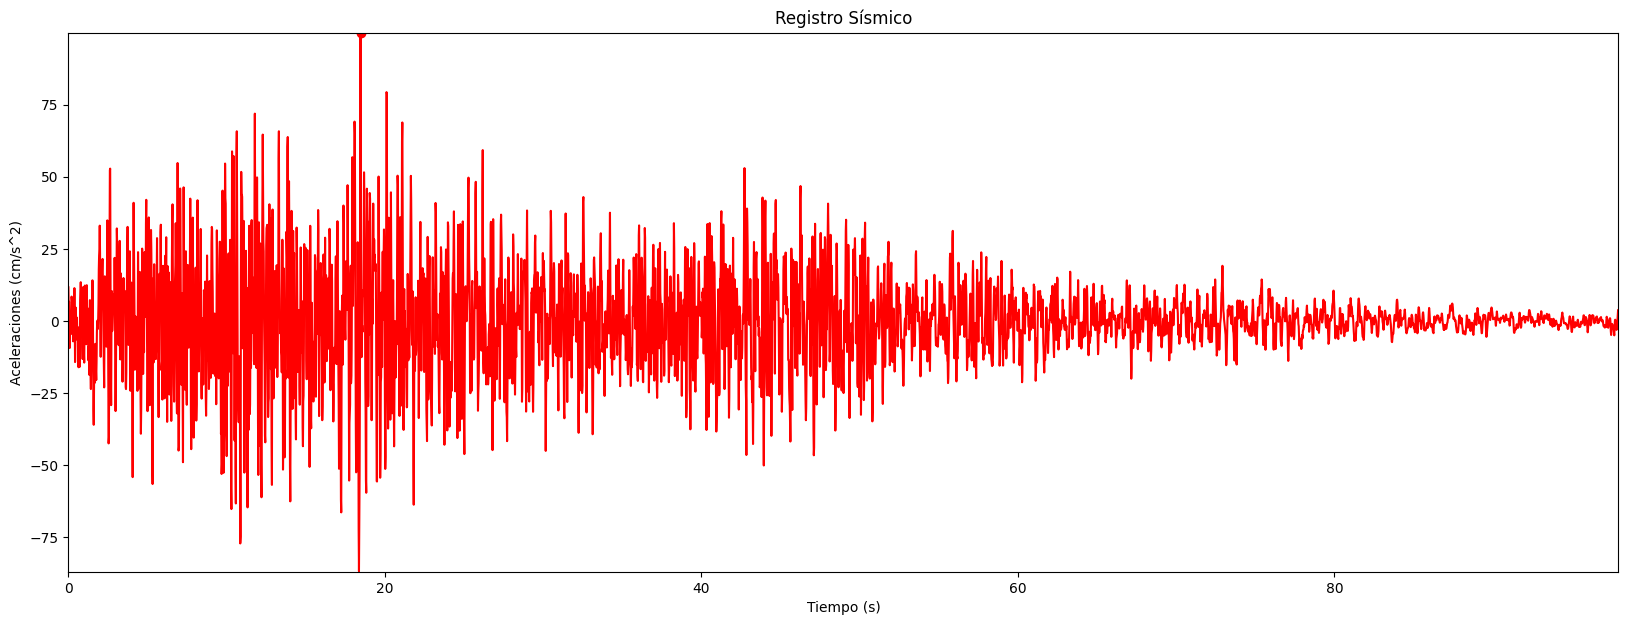

In [8]:

plt.figure(figsize=(20, 7))
pos1 = np.argmax(np.abs(acce1[:, 1]))
plt.plot(acce1[:, 0], acce1[:, 1], 'r-', acce1[pos1, 0], acce1[pos1, 1], 'ro')
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleraciones (cm/s^2)")
plt.title("Registro Sísmico")
plt.xlim([0, max(acce1[:, 0])])
plt.ylim([min(acce1[:, 1]) - 0.2, max(acce1[:, 1]) + 0.2])

> **_Historia de deformación_** > <span style="color: rgb(144, 238, 144); font-family: 'Courier New'; font-weight: bold; font-style: italic;"></span>


(-1.3659141737001883, 1.282071427839209)

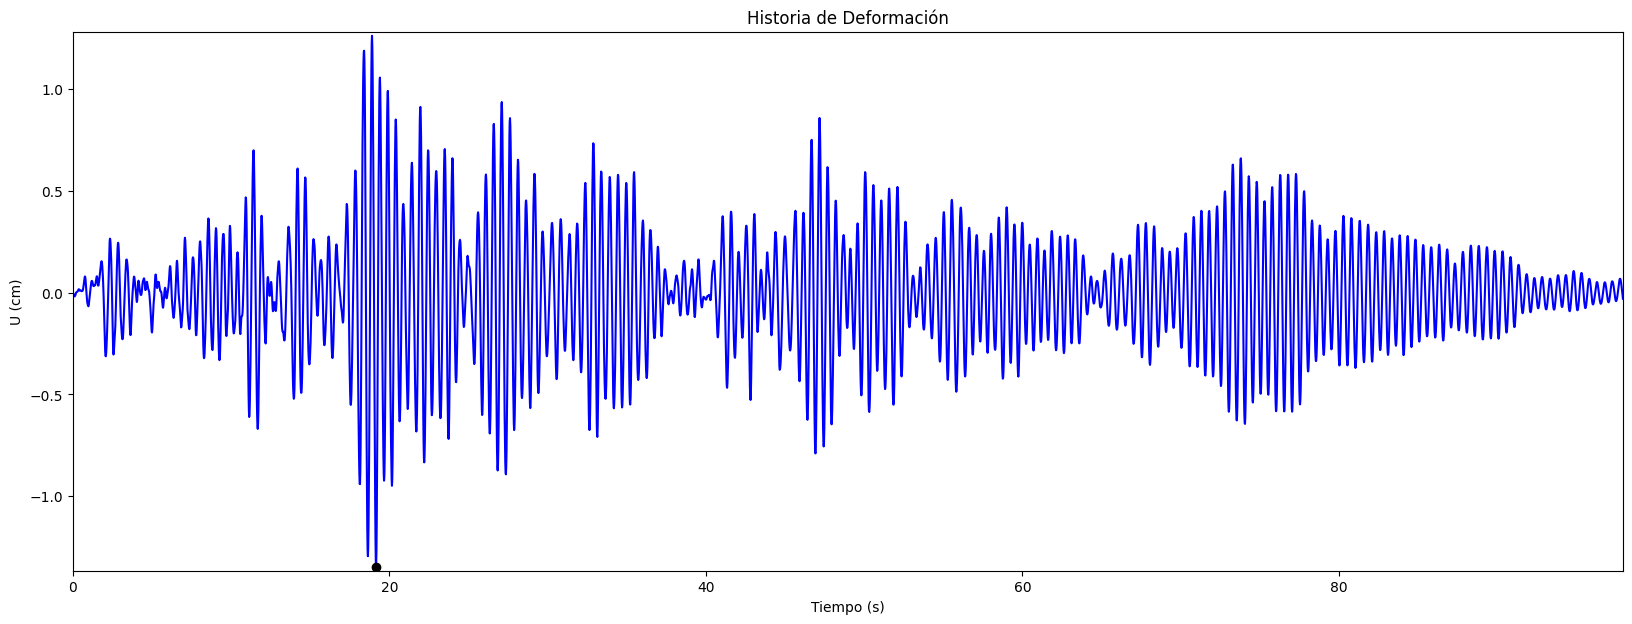

In [9]:

plt.figure(figsize=(20, 7))
pos2 = np.argmax(np.abs(u))
plt.plot(acce1[:, 0], u, 'b-', acce1[pos2, 0], u[pos2], 'ko')
plt.xlabel("Tiempo (s)")
plt.ylabel("U (cm)")
plt.title("Historia de Deformación")
plt.xlim([0, max(acce1[:, 0])])
plt.ylim([min(u) - 0.02, max(u) + 0.02])

> **_Historia de Pseudo Velocidad_** > <span style="color: rgb(144, 238, 144); font-family: 'Courier New'; font-weight: bold; font-style: italic;"></span>


(-17.230155930949444, 15.935560923353385)

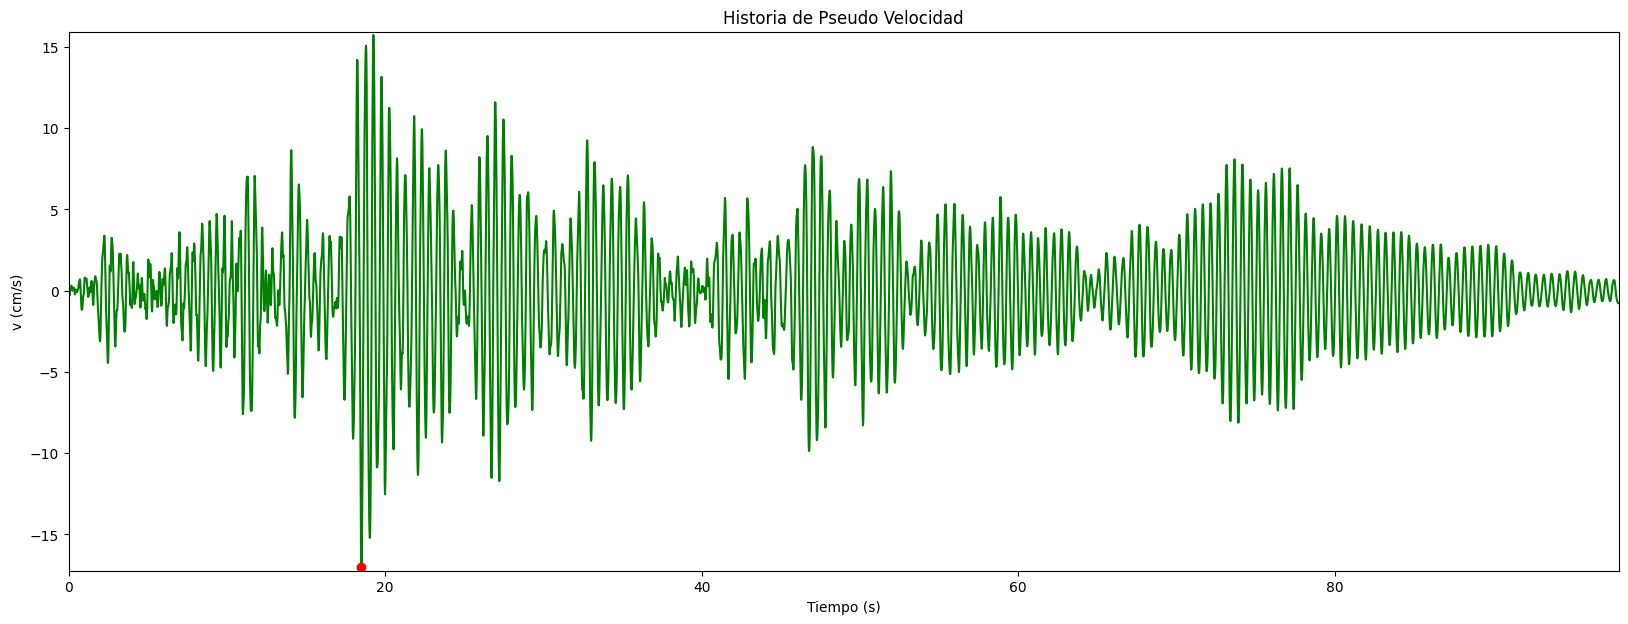

In [10]:
plt.figure(figsize=(20, 7))
pos3 = np.argmax(np.abs(v))
plt.plot(acce1[:, 0], v, 'g-', acce1[pos3, 0], v[pos3], 'ro')
plt.xlabel("Tiempo (s)")
plt.ylabel("v (cm/s)")
plt.title("Historia de Pseudo Velocidad")
plt.xlim([0, max(acce1[:, 0])])
plt.ylim([min(v) - 0.2, max(v) + 0.2])

> **_Historia de Aceleraciones_** > <span style="color: rgb(144, 238, 144); font-family: 'Courier New'; font-weight: bold; font-style: italic;"></span>


(-233.77140608413814, 246.47133084714474)

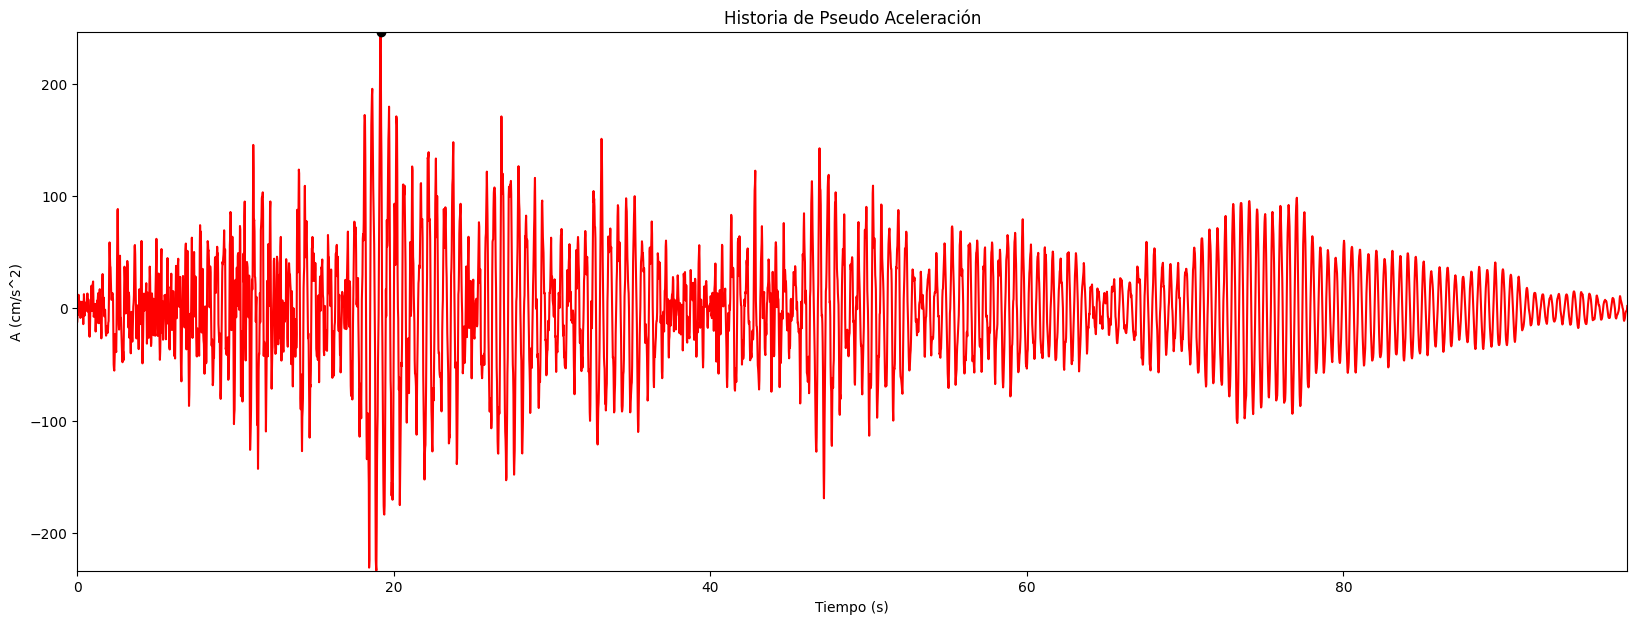

In [11]:
plt.figure(figsize=(20, 7))
pos4 = np.argmax(np.abs(a))
plt.plot(acce1[:, 0], a, 'r-', acce1[pos4, 0], a[pos4], 'ko')
plt.xlabel("Tiempo (s)")
plt.ylabel("A (cm/s^2)")
plt.title("Historia de Pseudo Aceleración")
plt.xlim([0, max(acce1[:, 0])])
plt.ylim([min(a) - 0.2, max(a) + 0.2])


# # Plotear con Plotly
# import plotly.graph_objects as go

# # Encontrar posición del máximo
# pos4 = np.argmax(np.abs(a))

# # Crear el gráfico con Plotly
# fig = go.Figure()

# # Plotear la serie de tiempo
# fig.add_trace(go.Scatter(x=acce1[:, 0], y=a, mode='lines', name='Historia de Pseudo Aceleración'))

# # Punto máximo
# fig.add_trace(go.Scatter(x=[acce1[pos4, 0]], y=[a[pos4]], mode='markers', marker=dict(color='black', size=10), name='Máximo'))

# # Configurar diseño
# fig.update_layout(
#     title="Historia de Pseudo Aceleración",
#     xaxis_title="Tiempo (s)",
#     yaxis_title="A (cm/s^2)",
#     xaxis=dict(range=[0, max(acce1[:, 0])]),
#     yaxis=dict(range=[min(a) - 0.2, max(a) + 0.2]),
#     height=500,
#     width=1300
# )

# # Mostrar el gráfico
# fig.show()

**_<font color="skyblue">Valores picos calculados</font>_**


In [12]:


PGA = acce1[pos1, 1]
u_max = np.max(np.abs(u))
v_max = np.max(np.abs(v))
a_max = np.max(np.abs(a))

# print("PGA (cm/s^2):", PGA)
# print("Máxima Deformación (cm):", u_max)
# print("Máxima Pseudo Velocidad (cm/s):", v_max)
# print("Máxima Pseudo Aceleración (cm/s^2):", a_max)

# Imprimir la tabla en formato Markdown
valmax = pd.DataFrame(data={"PGA (cm/s^2):": [PGA], "Máxima Deformación (cm):": [
                      u_max], "Máxima Pseudo Velocidad (cm/s):": [v_max], "Máxima Pseudo Aceleración (cm/s^2):": [a_max]}, index=["-"])
print(f"RESULTADOS DEL ANALISIS TIEMPO HISTORIA \n{valmax.T}")
print('''
    ''')
# Crear tabla con los resultados
table_data = [
    ["PGA", PGA, "cm/s^2"],
    ["Máxima Deformación", u_max, "cm/s"],
    ["Máxima Pseudo Velocidad", v_max, "cm/s^2"],
    ["Máxima Pseudo Aceleración", a_max, "cm/s"]
]
print(tabulate(table_data, headers=[
      "Nombre", "Valor", "Unidad"], tablefmt="pipe"))

plt.show()

RESULTADOS DEL ANALISIS TIEMPO HISTORIA 
                                              -
PGA (cm/s^2):                         99.750000
Máxima Deformación (cm):               1.345914
Máxima Pseudo Velocidad (cm/s):       17.030156
Máxima Pseudo Aceleración (cm/s^2):  246.271331

    
| Nombre                    |     Valor | Unidad   |
|:--------------------------|----------:|:---------|
| PGA                       |  99.75    | cm/s^2   |
| Máxima Deformación        |   1.34591 | cm/s     |
| Máxima Pseudo Velocidad   |  17.0302  | cm/s^2   |
| Máxima Pseudo Aceleración | 246.271   | cm/s     |
